In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/netflix-shows/netflix_titles.csv


In [2]:
'''Customize visualization
Seaborn and matplotlib visualization.'''
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

'''Plotly visualization .'''
import plotly.offline as py
from plotly.offline import iplot, init_notebook_mode
import plotly.graph_objs as go
py.init_notebook_mode(connected = True) # Required to use plotly offline in jupyter notebook

import cufflinks as cf #importing plotly and cufflinks in offline mode  
import plotly.offline  
cf.go_offline()  
cf.set_config_file(offline=False, world_readable=True)

'''Display markdown formatted output like bold, italic bold etc.'''
from IPython.display import Markdown
def bold(string):
    display(Markdown(string))

In [3]:
df = pd.read_csv("/kaggle/input/netflix-shows/netflix_titles.csv")

In [4]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


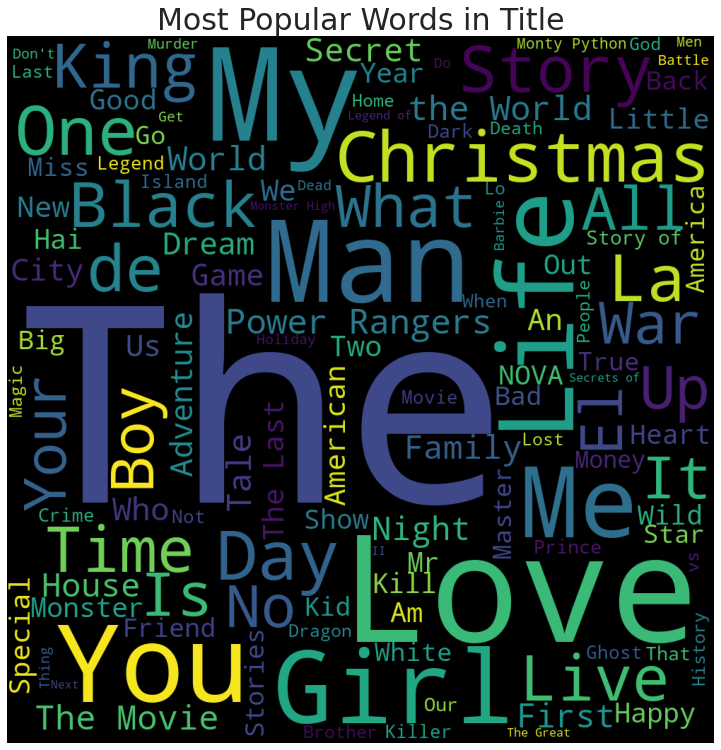

In [5]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
plt.rcParams['figure.figsize'] = (13, 13)
wordcloud = WordCloud(stopwords=STOPWORDS,background_color = 'black', width = 1000,  height = 1000, max_words = 121).generate(' '.join(df['title']))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Popular Words in Title',fontsize = 30)
plt.show()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


In [7]:
df.isnull().sum(axis = 0)

show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64

In [8]:
df = df.replace(np.nan, "No Info")
#fillna()

In [9]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,No Info,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,No Info,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,No Info,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [10]:
country_list = ['South Korea','Japan','United Kingdom','United States','China','India']
sel_df = df[df['country'].str.contains('|'.join(country_list))]

In [11]:
sel_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
71,80187061,Movie,The Mayor,Park In-je,"Min-sik Choi, Do-won Kwak, Eun-kyung Shim, So-...",South Korea,"September 30, 2017",2017,TV-MA,130 min,"Dramas, International Movies","With the presidency in mind, the incumbent may..."
146,81095101,TV Show,Vagabond,No Info,"Lee Seung-gi, Bae Suzy, Shin Sung-rok, Moon Ju...",South Korea,"September 21, 2019",2019,TV-MA,1 Season,"International TV Shows, Korean TV Shows, TV Ac...","When his nephew dies in a plane crash, stunt m..."
148,80241960,TV Show,DRAGON PILOT: Hisone & Masotan,No Info,"Misaki Kuno, Tomoyo Kurosawa, Maki Kawase, Sat...",Japan,"September 21, 2018",2018,TV-14,1 Season,"Anime Series, International TV Shows",Recently stationed Air Self-Defense Force rook...
166,80189183,TV Show,Mobile Suit Gundam UC,No Info,"Kouki Uchiyama, Ayumi Fujimura, Hiro Shimono, ...",Japan,"September 20, 2018",2014,TV-14,1 Season,"Anime Series, International TV Shows",When Banagher Links meets the mysterious Audre...


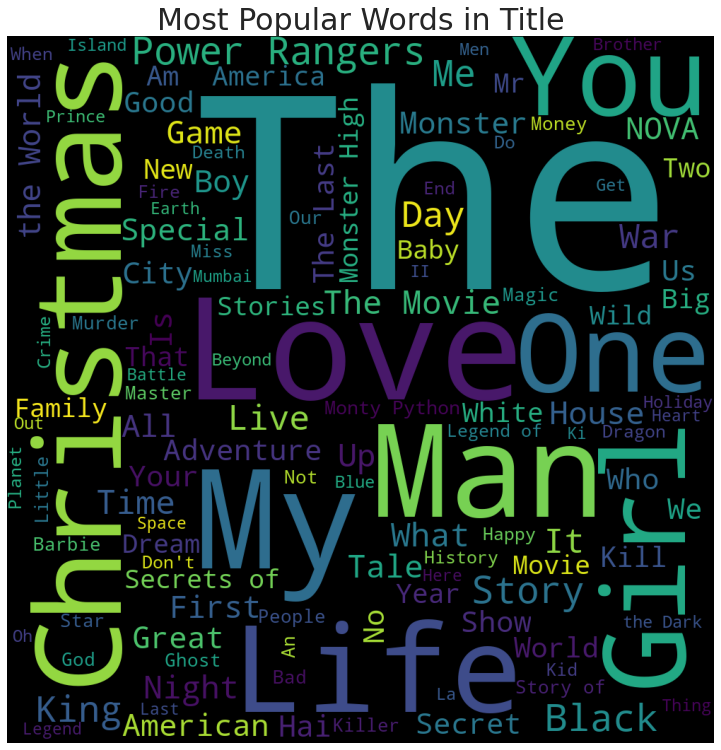

In [11]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
plt.rcParams['figure.figsize'] = (13, 13)
wordcloud = WordCloud(stopwords=STOPWORDS,background_color = 'black', width = 1000,  height = 1000, max_words = 121).generate(' '.join(sel_df['title']))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Popular Words in Title',fontsize = 30)
plt.show()

**Content-Based Movie Recommender System**

In [13]:
new_df = sel_df[['title','director','cast','listed_in','description','rating']]
new_df.head()

,title,director,cast,listed_in,description,rating
0,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,TV-PG
1,Jandino: Whatever it Takes,No Info,Jandino Asporaat,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,TV-MA
2,Transformers Prime,No Info,"Peter Cullen, Sumalee Montano, Frank Welker, J...",Kids' TV,"With the help of three human allies, the Autob...",TV-Y7-FV
3,Transformers: Robots in Disguise,No Info,"Will Friedle, Darren Criss, Constance Zimmer, ...",Kids' TV,When a prison ship crash unleashes hundreds of...,TV-Y7
4,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",Comedies,When nerdy high schooler Dani finally attracts...,TV-14


In [14]:
!pip install rake-nltk
from rake_nltk import Rake
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

  Created wheel for rake-nltk: filename=rake_nltk-1.0.4-py2.py3-none-any.whl size=7819 sha256=c121c7e5e5c6dd887ea3d8624c4bd1fcfc31236e752b33fdbeffb07728defeaf
  Stored in directory: /root/.cache/pip/wheels/7c/d9/8a/b8a9244fa89a07f288f9fe006aafc79d93fceb58496c29b606
Successfully built rake-nltk


In [15]:
# initializing the new column
new_df['Key_words'] = ""

for index, row in new_df.iterrows():
    description = row['description']

    # instantiating Rake, by default it uses english stopwords from NLTK
    # and discards all puntuation characters as well
    r = Rake()

    # extracting the words by passing the text
    r.extract_keywords_from_text(description)

    # getting the dictionary whith key words as keys and their scores as values
    key_words_dict_scores = r.get_word_degrees()
    
    # assigning the key words to the new column for the corresponding movie
    row['Key_words'] = list(key_words_dict_scores.keys())

In [16]:
# dropping the Plot column
new_df.drop(columns = ['description'], inplace = True)

In [17]:
new_df['cast'] = new_df['cast'].map(lambda x: x.lower().split(','))

# putting the genres in a list of words
new_df['listed_in'] = new_df['listed_in'].map(lambda x: x.lower().split(','))
new_df['director'] = new_df['director'].map(lambda x: x.lower().split(','))


In [18]:
new_df.head()

,title,director,cast,listed_in,rating,Key_words
0,Norm of the North: King Sized Adventure,"[richard finn, tim maltby]","[alan marriott, andrew toth, brian dobson, ...","[children & family movies, comedies]",TV-PG,"[stolen, artifact, evil, archaeologist, first,..."
1,Jandino: Whatever it Takes,[no info],[jandino asporaat],[stand-up comedy],TV-MA,"[challenges, sex, fire, comedy, show, jandino,..."
2,Transformers Prime,[no info],"[peter cullen, sumalee montano, frank welker...",[kids' tv],TV-Y7-FV,"[megatron, help, autobots, decepticons, leader..."
3,Transformers: Robots in Disguise,[no info],"[will friedle, darren criss, constance zimme...",[kids' tv],TV-Y7,"[new, autobot, force, prison, ship, crash, unl..."
4,#realityhigh,[fernando lebrija],"[nesta cooper, kate walsh, john michael higg...",[comedies],TV-14,"[lands, cross, hairs, nerdy, high, schooler, d..."


In [19]:
# merging together first and last name for each actor and director, so it's considered as one word 
# and there is no mix up between people sharing a first name
for index, row in new_df.iterrows():
    row['cast'] = [x.lower().replace(" ","") for x in row['cast']]
    row['director'] = [x.lower().replace(" ","") for x in row['director']]

In [20]:
new_df.head()

,title,director,cast,listed_in,rating,Key_words
0,Norm of the North: King Sized Adventure,"[richardfinn, timmaltby]","[alanmarriott, andrewtoth, briandobson, coleho...","[children & family movies, comedies]",TV-PG,"[stolen, artifact, evil, archaeologist, first,..."
1,Jandino: Whatever it Takes,[noinfo],[jandinoasporaat],[stand-up comedy],TV-MA,"[challenges, sex, fire, comedy, show, jandino,..."
2,Transformers Prime,[noinfo],"[petercullen, sumaleemontano, frankwelker, jef...",[kids' tv],TV-Y7-FV,"[megatron, help, autobots, decepticons, leader..."
3,Transformers: Robots in Disguise,[noinfo],"[willfriedle, darrencriss, constancezimmer, kh...",[kids' tv],TV-Y7,"[new, autobot, force, prison, ship, crash, unl..."
4,#realityhigh,[fernandolebrija],"[nestacooper, katewalsh, johnmichaelhiggins, k...",[comedies],TV-14,"[lands, cross, hairs, nerdy, high, schooler, d..."


In [21]:
new_df.set_index('title', inplace = True)
new_df.head()

,director,cast,listed_in,rating,Key_words
title,,,,,
Norm of the North: King Sized Adventure,"[richardfinn, timmaltby]","[alanmarriott, andrewtoth, briandobson, coleho...","[children & family movies, comedies]",TV-PG,"[stolen, artifact, evil, archaeologist, first,..."
Jandino: Whatever it Takes,[noinfo],[jandinoasporaat],[stand-up comedy],TV-MA,"[challenges, sex, fire, comedy, show, jandino,..."
Transformers Prime,[noinfo],"[petercullen, sumaleemontano, frankwelker, jef...",[kids' tv],TV-Y7-FV,"[megatron, help, autobots, decepticons, leader..."
Transformers: Robots in Disguise,[noinfo],"[willfriedle, darrencriss, constancezimmer, kh...",[kids' tv],TV-Y7,"[new, autobot, force, prison, ship, crash, unl..."
#realityhigh,[fernandolebrija],"[nestacooper, katewalsh, johnmichaelhiggins, k...",[comedies],TV-14,"[lands, cross, hairs, nerdy, high, schooler, d..."


In [22]:
new_df['bag_of_words'] = ''
columns = new_df.columns
for index, row in new_df.iterrows():
    words = ''
    for col in columns:
        words = words + ' '.join(row[col])+ ' '
    row['bag_of_words'] = words
    
new_df.drop(columns = [col for col in new_df.columns if col!= 'bag_of_words'], inplace = True)

In [23]:
new_df.head()

,bag_of_words
title,
Norm of the North: King Sized Adventure,richardfinn timmaltby alanmarriott andrewtoth ...
Jandino: Whatever it Takes,noinfo jandinoasporaat stand-up comedy T V - M...
Transformers Prime,noinfo petercullen sumaleemontano frankwelker ...
Transformers: Robots in Disguise,noinfo willfriedle darrencriss constancezimmer...
#realityhigh,fernandolebrija nestacooper katewalsh johnmich...


In [24]:
# instantiating and generating the count matrix
count = CountVectorizer()
count_matrix = count.fit_transform(new_df['bag_of_words'])

# creating a Series for the movie titles so they are associated to an ordered numerical
# list I will use later to match the indexes
indices = pd.Series(new_df.index)
indices[:5]

0    Norm of the North: King Sized Adventure
1                 Jandino: Whatever it Takes
2                         Transformers Prime
3           Transformers: Robots in Disguise
4                               #realityhigh
Name: title, dtype: object

In [26]:
import tensorflow_hub as hub

embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

In [27]:
new_df['vector']=new_df['bag_of_words'].apply(lambda x: embed([x]).numpy()[0])

In [28]:
new_df.head()

,bag_of_words,vector
title,,
Norm of the North: King Sized Adventure,richardfinn timmaltby alanmarriott andrewtoth ...,"[-0.06749052, -0.049514763, 0.024711, 0.022861..."
Jandino: Whatever it Takes,noinfo jandinoasporaat stand-up comedy T V - M...,"[0.0034503143, 0.021490734, 0.08133292, 0.0416..."
Transformers Prime,noinfo petercullen sumaleemontano frankwelker ...,"[-0.022279503, -0.06620341, -0.04040081, -0.01..."
Transformers: Robots in Disguise,noinfo willfriedle darrencriss constancezimmer...,"[-0.014131712, -0.060782816, -0.0108300345, 0...."
#realityhigh,fernandolebrija nestacooper katewalsh johnmich...,"[-0.04231187, 0.03286237, 0.02614902, -0.01202..."


In [29]:
from sklearn.metrics.pairwise import euclidean_distances
distances = euclidean_distances(list(new_df['vector']))

In [30]:
cos_sim = cosine_similarity(list(new_df['vector']))

In [31]:
cosine_sim = cosine_similarity(count_matrix, count_matrix)

In [32]:
recommended_movies = set()

In [33]:
def recommendations_dist(Title, dist, recommended_movies):
    
    # gettin the index of the movie that matches the title
    idx = indices[indices == Title].index[0]

    # creating a Series with the similarity scores in descending order
    score_series = pd.Series(dist[idx]).sort_values(ascending = True)

    # getting the indexes of the 10 most similar movies
    top_10_indexes = list(score_series.iloc[0:10].index)
    
    # populating the list with the titles of the best 10 matching movies
    for i in top_10_indexes:
        recommended_movies.add(list(new_df.index)[i])
        
    return recommended_movies - set([Title])

In [34]:
def recommendations_sim(Title, sim, recommended_movies):
    
    # gettin the index of the movie that matches the title
    idx = indices[indices == Title].index[0]

    # creating a Series with the similarity scores in descending order
    score_series = pd.Series(sim[idx]).sort_values(ascending = False)

    # getting the indexes of the 10 most similar movies
    top_10_indexes = list(score_series.iloc[1:11].index)
    
    # populating the list with the titles of the best 10 matching movies
    for i in top_10_indexes:
        recommended_movies.add(list(new_df.index)[i])
        
    return recommended_movies
        

In [35]:
recommended_movies =recommendations_dist('Stranger', distances, recommended_movies)

In [42]:
recommended_movies = recommendations_sim('Stranger', cosine_sim, recommended_movies)

In [43]:
recommended_movies = recommendations_sim('Stranger', cos_sim, recommended_movies)
recommended_movies

{'A Man Called God',
 'Abyss',
 'B: The Beginning',
 'Bad Guys',
 'Bad Guys: Vile City',
 'Black',
 'Hello, My Twenties!',
 'K-POP Extreme Survival',
 'Love for Ten: Generation of Youth',
 'Memories of the Alhambra',
 'Momo Salon',
 'My Little Baby',
 'Possessed',
 'Signal',
 'Tunnel'}

In [36]:
def recommend_list(Title):
    recommended_movies = set()
    recommended_movies = recommendations_dist(Title, distances, recommended_movies)
    recommended_movies = recommendations_sim(Title, cosine_sim, recommended_movies)
    recommended_movies = recommendations_sim(Title, cos_sim, recommended_movies)
    
    return list(recommended_movies)
    
    

In [37]:
recommend_list('When the Camellia Blooms')

['Second 20s',
 'Beating Again',
 'That Winter, the Wind Blows',
 'Inheritors',
 '12 Years Promise',
 'Spark',
 'Love Rain',
 'Goodbye My Wife',
 'One Spring Night',
 'Magic Phone',
 'Hymn of Death',
 'This Is My Love',
 'Something in the Rain',
 'Secret Affair',
 'Can We Get Married?',
 'Qué pena tu serie']

In [38]:
recommend_list("Live")

['Bad Guys',
 'Signal',
 'Bad Guys: Vile City',
 'Chef & My Fridge',
 'Rica, Famosa, Latina',
 'Man to Man',
 'Possessed',
 'Misaeng',
 'A Man Called God',
 'Hinterland',
 'Under Arrest',
 'Kiss Me First',
 'The Defected',
 'The Lies Within',
 'That Winter, the Wind Blows',
 'My Hotter Half',
 'Big Dreams, Small Spaces',
 'The K2',
 'Terrorism Close Calls']

In [39]:
recommend_list('Strong Girl Bong-soon')

['My First First Love',
 'This Is My Love',
 'Lucifer',
 'Jack Taylor',
 'Spark',
 'Hymn of Death',
 'Bad Guys: Vile City',
 'Tunnel',
 'Possessed',
 'A Man Called God',
 'Queen of the South',
 'Limitless',
 'Kiss Me First',
 'Oh My Ghost',
 "Marvel's Luke Cage",
 'My Little Baby',
 'My Hotter Half',
 'The Liar and His Lover']

In [40]:
recommend_list('Tunnel')

['Second 20s',
 'A Man Called God',
 'The Lies Within',
 'Paranoid',
 'Day and Night',
 'Abyss',
 'Kiss Me First',
 'Signal',
 'My Little Baby',
 'Bring It On, Ghost',
 'My Sassy Girl',
 'Magic Phone',
 'Marcella',
 'Mr. Sunshine',
 'Black',
 'Stranger',
 'Possessed',
 'B: The Beginning']